Import

In [57]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

File load

In [58]:
train = pd.read_csv("./bike-sharing-demand/train.csv", parse_dates=["datetime"])
test = pd.read_csv("./bike-sharing-demand/test.csv", parse_dates=["datetime"])

train.shape, test.shape

((10886, 12), (6493, 9))

In [59]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 16)

In [60]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 13)

Data Check

In [28]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=train, x = "year", y = "count", ax = ax1)
sns.barplot(data=train, x = "month", y = "count", ax = ax2)
sns.barplot(data=train, x = "hour", y = "count", ax = ax3)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by hour")

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

In [8]:
pip install -U pandas-profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached phik-0.12.0-cp39-cp39-win_amd64.whl (659 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached pydantic-1.9.0-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chatterbot 1.0.4 requires python-dateutil<2.8,>=2.7, but you have python-dateutil 2.8.2 which is incompatible.
chatterbot 1.0.4 requires sqlalchemy<1.3,>=1.2, but you have sqlalchemy 1.4.27 which is incompatible.


In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Export html report
profile.to_file("train_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data Preprocessing

In [61]:
# Category
# 범주형 feature의 type을 category로 변경
categorical_feature_names = ["season", "holiday", "workingday", "weather",
                             "dayofweek", "month", "year", "hour"]

In [62]:
for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [63]:
feature_names = ["season", "weather", "temp", "atemp", "humidity",
                 "year", "hour", "dayofweek", "holiday", "workingday"]
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [64]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 10)


season weather  temp   atemp  humidity  year hour dayofweek holiday  \
0      1       1  9.84  14.395        81  2011    0         5       0   
1      1       1  9.02  13.635        80  2011    1         5       0   
2      1       1  9.02  13.635        80  2011    2         5       0   
3      1       1  9.84  14.395        75  2011    3         5       0   
4      1       1  9.84  14.395        75  2011    4         5       0   

  workingday  
0          0  
1          0  
2          0  
3          0  
4          0

In [65]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 10)


season weather   temp   atemp  humidity  year hour dayofweek holiday  \
0      1       1  10.66  11.365        56  2011    0         3       0   
1      1       1  10.66  13.635        56  2011    1         3       0   
2      1       1  10.66  13.635        56  2011    2         3       0   
3      1       1  10.66  12.880        56  2011    3         3       0   
4      1       1  10.66  12.880        56  2011    4         3       0   

  workingday  
0          1  
1          1  
2          1  
3          1  
4          1

In [66]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [67]:
# existing 성능 평가 방법
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):
    
    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    log_predict = np.log(predicted_values+1)
    log_actual = np.log(actual_values+1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

In [68]:
# import
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [69]:
#LinearRegression

lModel = LinearRegression()

y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

preds = lModel.predict(X_train)
print("RMSLE Value For Linear Regression : ", rmsle(np.exp(y_train_log), np.exp(preds), False))

RMSLE Value For Linear Regression :  0.9803697923313506


In [70]:
#Ridge Model
ridge_m_ = Ridge()
ridge_params_ = {'max_iter':[3000], 'alpha':[0.01, 0.1, 1, 2, 3, 4, 5, 10, 50, 100, 200, 300, 400, 500, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_, ridge_params_, scoring = rmsle_scorer, cv=5)

y_train_log = np.log1p(y_train)

grid_ridge_m.fit(X_train, y_train_log)

preds = grid_ridge_m.predict(X_train)

print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression : ", rmsle(np.exp(y_train_log), np.exp(preds), False))

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression :  0.9803697902780832


In [71]:
#Lasso
lasso_m_ = Lasso()

alpha = 1/np.array([0.01, 0.1, 1, 2, 3, 4, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
lasso_params_ = {'max_iter' : [3000], 'alpha':alpha}

grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_, scoring=rmsle_scorer, cv=5)

y_train_log = np.log1p(y_train)
grid_lasso_m.fit(X_train, y_train_log)

preds = grid_lasso_m.predict(X_train)

print(grid_lasso_m.best_params_)
print("RMSLE Value For Lasso Regression : ", rmsle(np.exp(y_train_log), np.exp(preds), False))

{'alpha': 0.0016666666666666668, 'max_iter': 3000}
RMSLE Value For Lasso Regression :  0.9803709413807513


In [89]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)

score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print("RMSLE Value For RandomForest Regression : ", score)

RMSLE Value For RandomForest Regression :  0.10691216533849618


In [87]:
#GridentBoosting
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)

score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print("RMSLE Value For GradientBoostingRegressor Regression : ", score)

RMSLE Value For RandomForest Regression :  0.2135740372784033


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

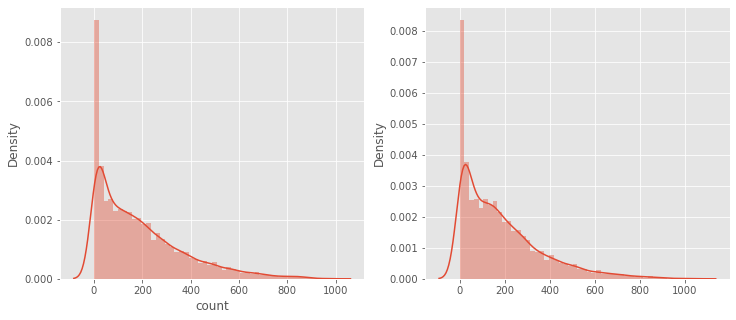

In [90]:
predsTest = gbm.predict(X_test)
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax=ax1, bins=50)
sns.distplot(np.exp(predsTest), ax=ax2, bins=50)

Submit

In [91]:
submission = pd.read_csv("./bike-sharing-demand/sampleSubmission.csv")
submission
          
submission["count"] = np.exp(predsTest)

print(submission.shape)
submission.head()

(6493, 2)


datetime      count
0  2011-01-20 00:00:00  11.227543
1  2011-01-20 01:00:00   6.296610
2  2011-01-20 02:00:00   4.259238
3  2011-01-20 03:00:00   2.666615
4  2011-01-20 04:00:00   2.295918

In [92]:
submission.to_csv("./bike-sharing-demand/Score_{0:.5f}_submission.csv".format(score), index=False)